# Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive.

### Sample file size

We need to determine the size of file titanic-data.csv provided just in case, so it is not a way too large. If it is large we would probably need to break it or analyse samples. As we can se the file size is only 61Kb, manageable for analysis size.

In [1]:
#checks the file size
import os
os.path.getsize('titanic-data.csv')/1000

61

### Plan of project

Plan:
1. Formulate few questions to be answered and determine what to investigate
2. Have a look at the file and see what it consists of and whether the data is consitent and not corrupt
3. Investigate the data by grouping and counting it and seeing if there are any conclusions to be made
4. Made visualizations of certain information points to illustrate the overall data points and also specific points
5. Make conclusions and discuss the deficiences

### Methodology to be used

We will use numpy and pandas to analyze our file. And first we will create a dataframe and see what table consists of: the table size is 891 rows X 12 columbs. 

An important row is 'Survived' which contains binary information: 1 for survived, 0 for deceased.
Here is an explanation of variables definitions:

Variable	Definition	 Key
survival	Survival	 0 = No, 1 = Yes
pclass	    Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
Sex        	Sex	
Age         Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('titanic-data.csv') #letting panda framing our csv file to a table format
#print df.head(2)
#print df.tail(2)
print 'number of rows', len(df)
df

number of rows 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Importing data visualization frameworks

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#insert data in graph
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Approach to problem 

We know from the intro that women, chidlren and upper class were the most likely to survive. Also, it was stated the one of the reasons was the lack of lifeboats for some passenges. By looking at the table, we can estimate the additional questions which we are going to be researching.
Obviously we need to prove that there is connection between percent of survival and Sex, Age and Passenger classes.  
I would also research weather having spouces, children or parents would actually increase survivorship chances. Possibly, it would increase for those who would have low chances otherwise.
I am going to try to see what happened with the crew - what was the chance of survivorship for crew members. We can probably identify them by Fare - obviously they haven't paid it or Cabin class.
Location of Cabin on the ship would also have an effect of survivorship as there is a chance that certain individuals were not able to emabark on boats as they were the last in the queue, or there was a panic and they could not leave. As such, the question is what are the chances of women, children and upper-class, i.e. those who had highest changes of survival to survive if they were in certain cabins? I am going to take one group - say upper class and see the survival rates based on cabin location.
There is a chance that in the panic, whole sections of the ships were cut off from access to the deck where lifeboat embarkment was happening. 
We should also see if all who embarked survived. There is a chance that some boats capped and were not found by resque mission. 

### Questions that will be investigated

1. Number of passengers survived broken down by Sex or Passenger Class or Fare
2. Number of passengers who were children and survival rates
3. Number of crew members and survival rates
4. Survival rates by Sex and Passenger class together
5. To investigate the above we will need to determine the type of data in the sample and its availability (not Null data)

### Sample description and analysis 

It should be noted that 1,502 passengers died (2,224 total passengers) or 67.5%. We should see if our sample's survivorship data is similar to it. 
Finally, our sample has 891 entries while Titanic ship had 2224, which is a very good sample and can probably be used to estimate the total population.
However, we need to be careful and see if the sample is not biased, i.e. that passengers of certain class or age, etc were not selected.

Below we can view the type of information in the dataframe. Majority of it are integers, followed by objects and floats. 

In [4]:
print df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Statistical description 

We will need to see a brief statistical description of our table, where numerical values will be analyzed and basic information like count, mean, standard deviation, quartiles will be provided. For some columns like Agge and Fare this summary gives a useful overview. Mean ages is 29.7 years with std of 14.5 years. Quartile information was not retrieved due to some null values. 'Fare' information provided some meaningful data, however it seems that there is significant difference between ticket price, where the lowest price was 0 and the highest 512. Probably, 0 ticket price was assigned to the crew. 

In [5]:
df.describe()

/Users/azizmamatov/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Titanic population data

We can see that 342 or 38.4% survived out of our total passengers in sample data. In total population we had 32% survivorship rate. 
We can also find out from open sources how many males and females were on the ship, but in our sample females are 35%.
As you can see below, there were 434/2226 or 19.5%. Our sample is misrepresented in women, i.e. it is too high for women.


http://www.icyousee.org/titanic.html

Women
Total: 434
Died: 110
Survived: 324
Survived: 75%


Children
Total: 112
Died: 56
Survived: 56
Survived: 50%


Men
Total: 1680
Died: 1357
Survived: 323
Survived: 19%


On Board
Total: 2226
Died: 1523
Survived: 703
Survived: 32%

### Null data and data wrangling

There are many null data in Age. 177 our of 891 represents almost 20% of information. Cabin information is only 23% available, with 77% is null. 
We will replace Null data as it will interfere with our calculations as rows with null data are not taken into account in many plots and caculations used throughout this project. 
We will fill the null rows in Age with mean data as below and in rows with categorical data they will be replaced by 'Unknown'. Unknown is considered to be as no data and will be still taken into account in calculations and plots.
For visualization purposes in column 'Survived' we will replace 1 and 0 with more understanding Yes and No strings.

In [20]:
print pd.isnull(df).sum()
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna('Unknown')
df['Survived'] = df['Survived'].replace([0], 'No')
df['Survived'] = df['Survived'].replace([1], 'Yes')


#print df['Cabin'].isnull().sum()
print df['Cabin'].describe()
df['Age'].describe()
print df['Survived'].head(5)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
count         891
unique        148
top       Unknown
freq          687
Name: Cabin, dtype: object
0     No
1    Yes
2    Yes
3    Yes
4     No
Name: Survived, dtype: object


### Number of passengers by Sex and Survived

female    314
male      577
Name: Sex, dtype: int64
Yes    342
No     549
Name: Survived, dtype: int64
Yes    109
No     468
Name: Survived, dtype: int64


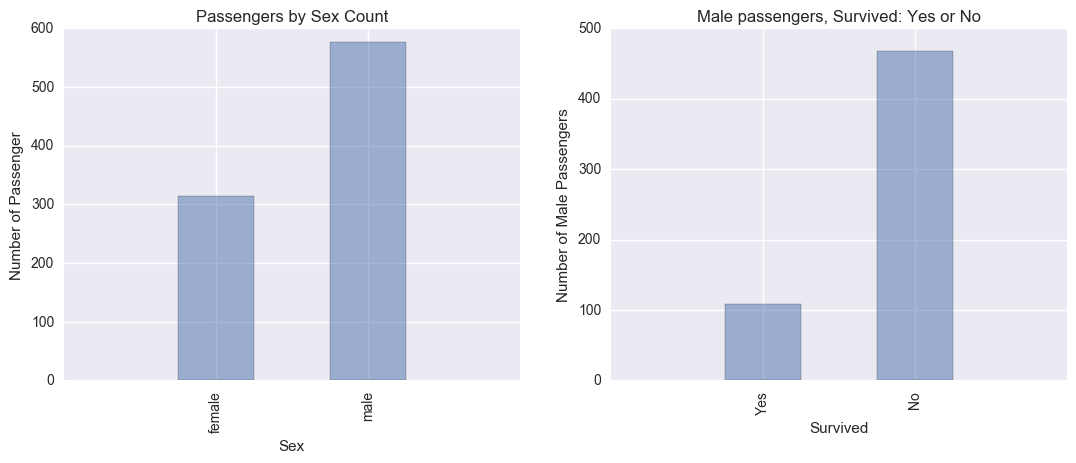

In [7]:
print pd.value_counts(df.Sex).sort_values() #counts number by Sex
print pd.value_counts(df.Survived).sort_values() #counts number by survived
print pd.value_counts(df.Survived[df.Sex == 'male']).sort_values() #counts number of male by survived
#print df.apply(pd.Series.value_counts(df.Survived))
#pd.value_counts(df.Sex).sort_values().unstack(level=0).plot(kind="bar")

fig = plt.figure(figsize=(20,10)) #prescribes size of graphs below

ax1 = plt.subplot2grid((2,3),(0,0)) #last (0,0) indicate the place on the code
pd.value_counts(df.Sex).sort_values().plot(kind='bar', alpha = 0.5)
ax1.set_xlim(-1, 2)
# puts a title on our graph
ax1.set_xlabel("Sex")
ax1.set_ylabel("Number of Passenger")
plt.title("Passengers by Sex Count")

ax3 = plt.subplot2grid((2,3),(0,1))
pd.value_counts(df.Survived[df.Sex == 'male']).sort_values().plot(kind='bar', alpha = 0.5)
ax3.set_xlim(-1, 2)
# puts a title on our graph
ax3.set_xlabel("Survived")
ax3.set_ylabel("Number of Male Passengers")
plt.title("Male passengers, Survived: Yes or No")

### Number of survived vs dead and Embarked by port
Below is visualization of number of survived vs dead and distribution of passengers by embarkement by ports.

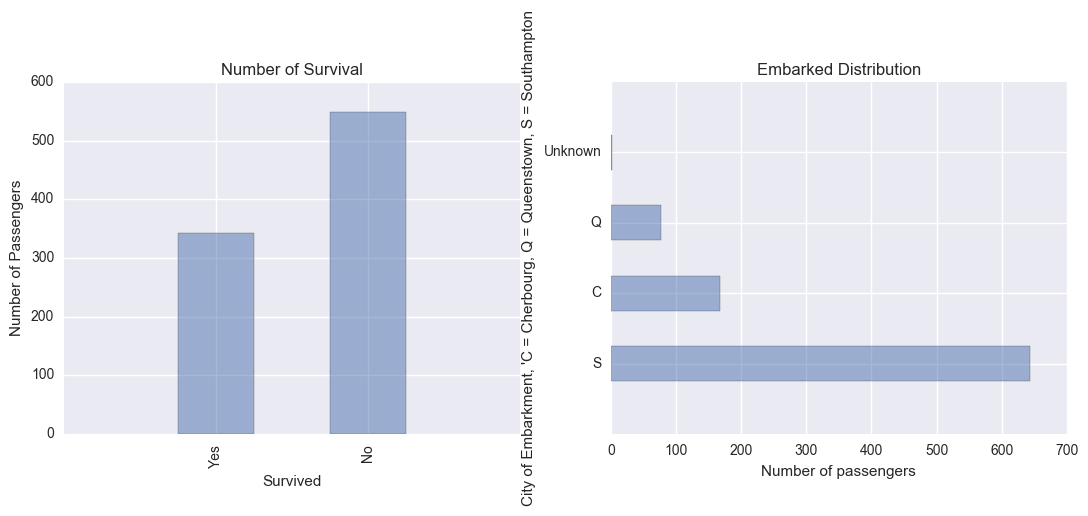

In [8]:
fig = plt.figure(figsize=(20,10)) 

ax4 = plt.subplot2grid((2,3),(0,0))
pd.value_counts(df.Survived).sort_values().plot(kind='bar', alpha = 0.5)
ax4.set_xlim(-1, 2)
# puts a title on our graph
ax4.set_xlabel("Survived")
ax4.set_ylabel("Number of Passengers")
plt.title("Number of Survival")

ax5 = plt.subplot2grid((2,3),(0,1))
df.Embarked.value_counts().plot(kind = 'barh', alpha = 0.5)
ax5.set_ylim(-1, len(df.Embarked.value_counts()))
ax5.set_xlabel("Number of passengers")
ax5.set_ylabel("City of Embarkment, 'C = Cherbourg, Q = Queenstown, S = Southampton")
plt.title("Embarked Distribution")


Yes    62.962963
No     37.037037
Name: Survived, dtype: float64
No     52.717391
Yes    47.282609
Name: Survived, dtype: float64
No     75.763747
Yes    24.236253
Name: Survived, dtype: float64


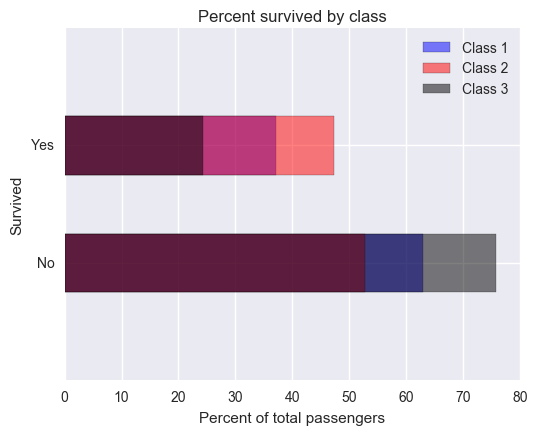

In [9]:
# ratio of survived passengers by classes
df_class_1 = df.Survived[df.Pclass == 1].value_counts()
df_class_1 = df_class_1/df_class_1.sum()*100
df_class_2 = df.Survived[df.Pclass == 2].value_counts()
df_class_2 = df_class_2/df_class_2.sum()*100
df_class_3 = df.Survived[df.Pclass == 3].value_counts()
df_class_3 = df_class_3/df_class_3.sum()*100

print df_class_1
print df_class_2
print df_class_3

fig = plt.figure(figsize=(20,10)) 

ax6 = plt.subplot2grid((2,3),(0,1))
df_class_1.plot(kind = 'barh', color='blue',label='Class 1', alpha = 0.5)
df_class_2.plot(kind = 'barh',color='red',label='Class 2', alpha = 0.5)
df_class_3.plot(kind = 'barh',color='black',label='Class 3', alpha = 0.5)
ax6.set_ylim(-1, len(df.Survived.value_counts()))
ax6.set_xlabel("Percent of total passengers")
ax6.set_ylabel("Survived")
plt.title("Percent survived by class")
plt.legend(loc='best')

### Visualization of sex and class distribution
Males were predominant in all classes but clearly so in third class.

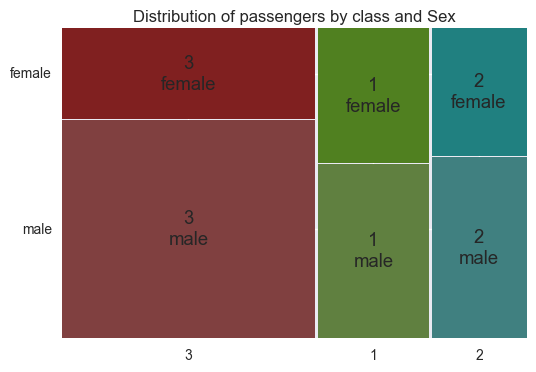

In [10]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(df, ['Pclass','Sex'])
plt.title("Distribution of passengers by class and Sex")


In [11]:
df.groupby(['Pclass', 'Sex']).size() #catches all cells including NaN
#provides for amount of passengers

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [12]:
#another method of counting passengers by Class and Sex
df.groupby(['Pclass', 'Sex'])[['PassengerId']].count()


PassengerId
Pclass Sex                
1      female           94
       male            122
2      female           76
       male            108
3      female          144
       male            347

### Crew members estimate 

Fifteen passenger paid 0 fare - are they crew members? As we can see from below, they they belong to different passenger classes - may be officers and sailors were assigned to different classes. Only 1 of them survived. All of them are male. Three of them had a cabin (all three were stationed in Class 1) while the rest had NaN in cabin values, and all embarked in S. None had any siblings / spouses on board. It looks like they were crew members.

In [13]:
print df.loc[df['Fare']==0,'Pclass'] #shows distribution by class of those zero fared passengers=
df.loc[df['Fare']==0,'Sex'] #show all males with Fare == 0


179    3
263    1
271    3
277    2
302    3
413    2
466    2
481    2
597    3
633    1
674    2
732    2
806    1
815    1
822    1
Name: Pclass, dtype: int64


179    male
263    male
271    male
277    male
302    male
413    male
466    male
481    male
597    male
633    male
674    male
732    male
806    male
815    male
822    male
Name: Sex, dtype: object

#### Only 6.7% of crew members survived

No     0.933333
Yes    0.066667
Name: Survived, dtype: float64


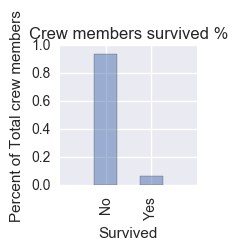

In [14]:
crew_members = df.Survived[df.Fare == 0].value_counts()
crew_members = crew_members/crew_members.sum()
print crew_members
ax4 = plt.subplot2grid((2,3),(0,0))
crew_members.plot(kind='bar', alpha = 0.5)
ax4.set_xlim(-1, 2)
# puts a title on our graph
ax4.set_xlabel("Survived")
ax4.set_ylabel("Percent of Total crew members")
plt.title("Crew members survived %")

### Selecting only survived

This will help to focus only on survived and in visualisation

In [15]:
#selecting only survived in dataframe
df_survived = df.loc[df['Survived'] == 'Yes']
print type(df_survived)
#df_survived['percent']= df_survived['Sex']/df_survived['Sex'].sum() #need to calculate Sex and Pclass 
print df_survived.head(2)

<class 'pandas.core.frame.DataFrame'>
   PassengerId Survived  Pclass  \
1            2      Yes       1   
2            3      Yes       3   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  Unknown        S  


### Survived children
Number of survechildren, i.e. the passengers whose age was equal or below 16. There were more survivors amongst female children than male ones.

               PassengerId
Sex    Pclass             
female 1                 5
       2                10
       3                18
male   1                 3
       2                 9
       3                10


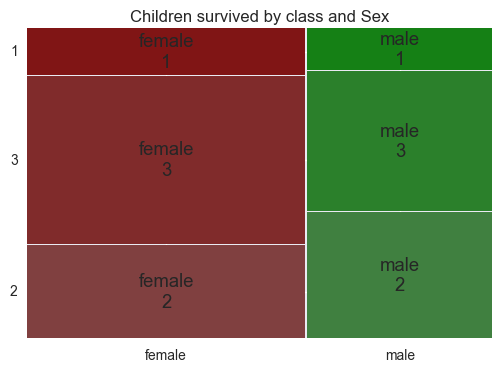

In [16]:
survived_children = df_survived.loc[df['Age'] <= 16] #shows all columns for passengers <= 16 years old
survived_children.filter(['Pclass', 'Sex'], axis=1)

print survived_children.groupby(['Sex', 'Pclass'])[['PassengerId']].count()

plt.rcParams['font.size'] = 16.0
mosaic(survived_children, ['Sex', 'Pclass'])
plt.title("Children survived by class and Sex")


### Survived vs Sex vs Class
Below is summary of all survived by Sex and class - we can use total count and percentages. It can be used for visualiazation later. Two variables have been used.

In [17]:
x = df_survived.groupby(['Pclass', 'Sex'])[['PassengerId']].count() #absolute number
print x
class_sex_percent = x.groupby(level=0).apply(lambda x: x/float(x.sum())) #conversion to percentage
print class_sex_percent


               PassengerId
Pclass Sex                
1      female           91
       male             45
2      female           70
       male             17
3      female           72
       male             47
               PassengerId
Pclass Sex                
1      female     0.669118
       male       0.330882
2      female     0.804598
       male       0.195402
3      female     0.605042
       male       0.394958


### Mosaic graph by Pclass and Sex

Visualization of only survived members by Sex and Class. Clearly it can be seen that female and class 1 were amongst the survived. 

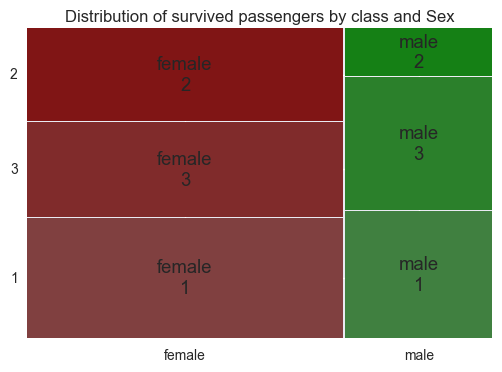

In [18]:
plt.rcParams['font.size'] = 16.0
mosaic(df_survived, ['Sex', 'Pclass'])
plt.title("Distribution of survived passengers by class and Sex")


### Visualization of survival by Sex broken by Absolute number and Percentage. 
Women survived at much higher rate and even in absolute numbers.

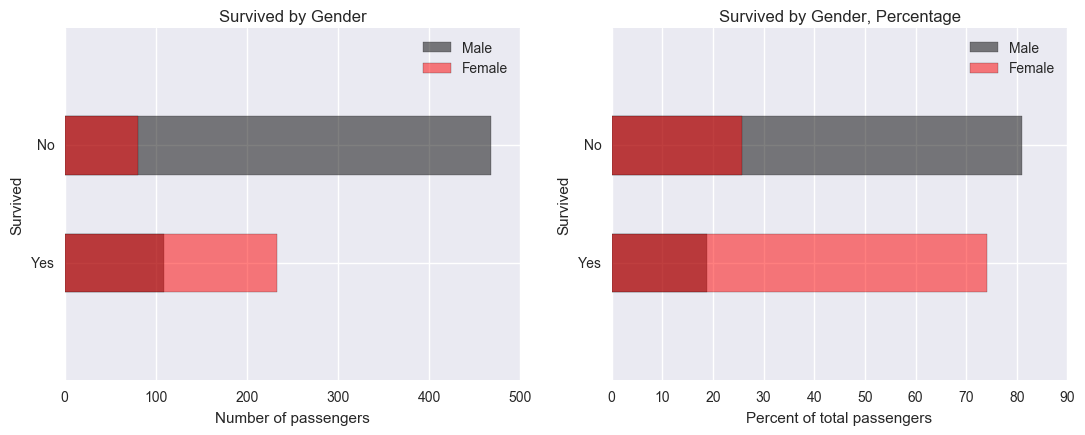

In [19]:
fig = plt.figure(figsize=(20,10))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = pd.value_counts(df.Survived[df.Sex == 'male']).sort_values() #df.Survived[df.Sex == 'male'].value_counts()
df_female = df.Survived[df.Sex == 'female'].value_counts()

#ax1 = fig.add_subplot(121)
ax1 = plt.subplot2grid((2,3),(0,0))
df_male.plot(kind='barh', color = 'black', label='Male', alpha=0.5)
df_female.plot(kind='barh', color='red',label='Female', alpha=0.5)
plt.title("Survived by Gender"); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 
ax1.set_xlabel("Number of passengers")
ax1.set_ylabel("Survived")
#adjust graph to display the proportions of survival by gender
#ax2 = fig.add_subplot(122)
ax1 = plt.subplot2grid((2,3),(0,1))
(df_male/(df_male.sum())*100).plot(kind='barh',color = 'black', label='Male', alpha=0.5)  
(df_female/(df_female.sum())*100).plot(kind='barh', color='red',label='Female', alpha=0.5)
plt.title("Survived by Gender, Percentage"); plt.legend(loc='best')
ax1.set_ylim(-1, 2)
ax1.set_xlabel("Percent of total passengers")
ax1.set_ylabel("Survived")

## Conclusions
Female passengers survived more than male ones.
1st class passengers survived more than 2nd and 3d, and 2nd more than the 3d.
Crew members were possibly those who had Fare == 0 were male, did not have any family members, most of them did not have cabin numbers and they had 6.7% chance of survival.
Third of age data is missing therefore it would be harder to make conclusions based on age.
This sample seems to be resresentative of the total population based on its size and random distribution where percentages of male, female, passenger classes are similar to total population ones. 